In [33]:
import numpy as np
import matplotlib.pyplot as plt


# DBScan Algorithm Implementation from Scratch

This notebook implements the DBScan algorithm entirely from scratch, using only NumPy for calculations. It evaluates the clustering results using the Silhouette Index and Dunn Index, both of which are also implemented from scratch.


## Step 1: Load and visualize the data
Load the data from the `npz` files and plot the instances.

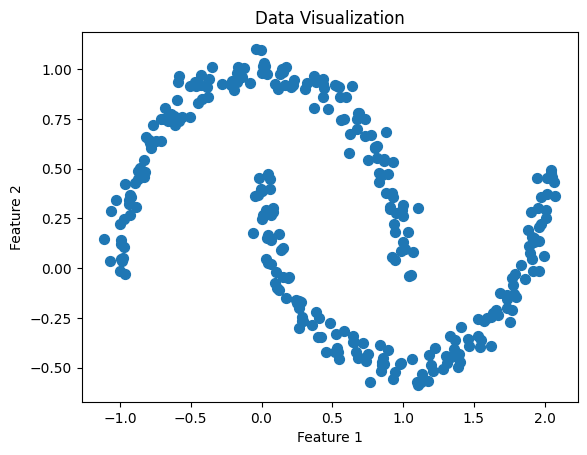

In [34]:

# Load the data from npz file
data = np.load('dataset3.npz')
X = data['data']

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Data Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [35]:
def compute_distance(point1, point2, metric='L2'):

    result = None

    if metric == 'L1':
        result =  np.sum(np.abs(point1 - point2))
    elif metric == 'L2':
        result = np.sqrt(np.sum((point1 - point2) ** 2))
    elif metric == 'cosine':
        dot_product = np.dot(point1, point2)
        norm_a = np.linalg.norm(point1)
        norm_b = np.linalg.norm(point2)
        result = 1 - dot_product / (norm_a * norm_b)
    else:
        return ValueError("Unsupported metric")
    
    return result

## Step 2: Implement DBScan Algorithm

In [36]:
def get_point_index(X, point): 
    for i in range(X.shape[0]):
        if np.array_equal(X[i], point):
            return i
    return -1

def region_query(X, point, eps, metric='L2'):
        
    neighbors = []

    ########## Your code goes here ##########
    for p in X:
        if compute_distance(point, p, metric) <= eps:
            neighbors.append(get_point_index(X, p))
    ##########################################

    return neighbors


def expand_cluster(X, point, neighbors, cluster_counter, labels, visited, min_pts, eps, metric):

    ########## Your code goes here ##########
    labels[point] = cluster_counter
    for p in neighbors:
        if not visited[p]:
            visited[p] = True
            p_neighbors = region_query(X, X[p], eps, metric)
            if len(p_neighbors) >= min_pts:
                for n in p_neighbors:
                    if n not in neighbors:
                        neighbors.append(n)
        if labels[p] == -1:
            labels[p] = cluster_counter

    ##########################################

    return labels, visited

In [37]:
def DBSCAN(X, eps, min_pts, metric='L2'):
    """DBScan algorithm implementation."""

    labels = None
    
    ########## Your code goes here ##########
    cluster_counter = 0
    visited = np.array([False] * X.shape[0])
    labels = np.array([-1] * X.shape[0])
    for p in range(X.shape[0]):
        if not visited[p]:
            visited[p] = True
            neighbors = region_query(X, X[p], eps, metric)
            if len(neighbors) < min_pts:
                labels[p] = -1
            else:
                cluster_counter += 1
                labels, visited = expand_cluster(X, p, neighbors, cluster_counter, labels, visited, min_pts, eps, metric)
    ##########################################

    return labels


## Step 3: Evaluate Silhouette Score & Dunn Index 
You can copy them from K-Means. 

In [38]:
def compute_silhouette_score(X, labels, metric='L2'):
    """
    Compute the silhouette score for the clustering.
    
    Parameters:
    X (numpy array): The dataset.
    labels (numpy array): Cluster assignments.
    
    Returns:
    silhouette_score(float): Silhouette score.
    """

    silhouette_score = None

    ########## Your code goes here ##########
    silhouette_score = 0
    for i in range(X.shape[0]):
        same_cluster = X[labels.flatten() == labels[i]]
        other_cluster = X[labels.flatten() != labels[i]]
        a_i = (1 / (same_cluster.shape[0] - 1)) * np.sum([compute_distance(X[i], point, metric) for point in same_cluster if not np.array_equal(point, X[i])])
        b_i = np. min([np.mean([compute_distance(X[i], point, metric) for point in other_cluster])])
        s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_score += s_i
    silhouette_score /= X.shape[0]
    ##########################################

    return silhouette_score

In [39]:
def compute_dunn_index(X, labels, metric='L2'):
    """
    Compute the Dunn Index for the clustering.

    Parameters:
    X (numpy array): The dataset of shape (n, d).
    labels (numpy array): Cluster assignments of shape (n,).
    metric (str): Distance metric ('L1', 'L2', 'cosine').

    Returns:
    dunn_index (float): Dunn Index.
    """

    dunn_index = None

    ########## Your code goes here ##########
    min_dist = min([compute_distance(X[i], X[j], metric) 
                    for i in range(X.shape[0]) 
                    for j in range(X.shape[0]) 
                    if labels[i] != labels[j]])
    max_dist = max([compute_distance(X[i], X[j], metric) 
                    for i in range(X.shape[0]) 
                    for j in range(X.shape[0]) 
                    if labels[i] == labels[j]])
    dunn_index = min_dist / max_dist
    ##########################################

    return dunn_index

## Step 5: Apply DBScan and Evaluate Metrics

Silhouette Score: 0.32604724935951884
Dunn Index: 0.18005391910906268


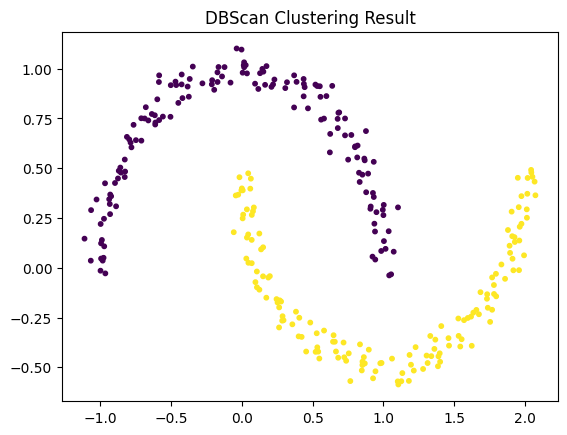

In [40]:
# Apply DBScan
eps = 0.2
min_pts = 4
metric = 'L1'
labels = DBSCAN(X, eps, min_pts, metric)

# Compute silhouette score
silhouette_score = compute_silhouette_score(X, labels)
print('Silhouette Score:', silhouette_score)

# Compute Dunn Index
dunn_index = compute_dunn_index(X, labels)
print('Dunn Index:', dunn_index)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10)
plt.title('DBScan Clustering Result')
plt.show()